## Plot ROC_Curve

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [33]:
domain = 'dos_vs_probe'
data_folder = 'matlab/data/'+domain+'/result/'
folder_name = 'norm.k4.b0'
train = pd.read_csv(os.path.join(data_folder, folder_name)+"/transformed_source.csv",header = None) 
test = pd.read_csv(os.path.join(data_folder, folder_name)+"/transformed_target.csv",header = None) 
features_len = len(test.columns)-1

In [34]:
X_train = train.iloc[:,0:features_len].as_matrix()
y_train = train.iloc[:,features_len]
X_test = test.iloc[:,0:features_len].as_matrix()
y_test = test.iloc[:,features_len]

In [35]:
from sklearn import svm
_train = preprocessing.normalize(X_train, norm='l2')
_test = preprocessing.normalize(X_test, norm='l2')
clf = svm.SVC(kernel='linear', C=1,probability=True).fit(_train, y_train)
y_score_svm = clf.predict_proba(_test)[:,1]
y_pred = clf.predict(_test)
print accuracy_score(y_test, y_pred)
print "accuracy" ,clf.score(_test, y_test)
print 'f1',f1_score(y_test, y_pred, average='binary',pos_label=1)  
print precision_score(y_test, y_pred, average='binary',pos_label=1)  
print recall_score(y_test, y_pred, average='binary',pos_label=1)  

0.4965
accuracy 0.4965
f1 0.663548279318
0.4965
1.0


In [36]:
def plot_roc(y_test, y_score,title):
    from sklearn import metrics
    fpr, tpr, threth_hold = metrics.roc_curve(y_test, y_score)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title(title)
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    print tpr
    ##############################################################################
    # Plot of a ROC curve for a specific class
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend( loc="lower right") 
    plt.show()

[ 0.  1.]


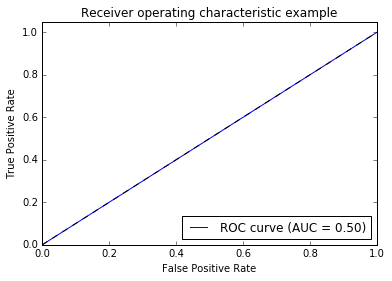

In [37]:
plot_roc(y_test, y_pred,domain)